# Smoothing and finding the signal (Gaussian bumps)

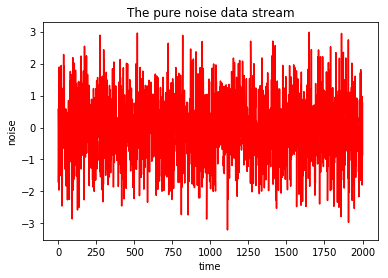

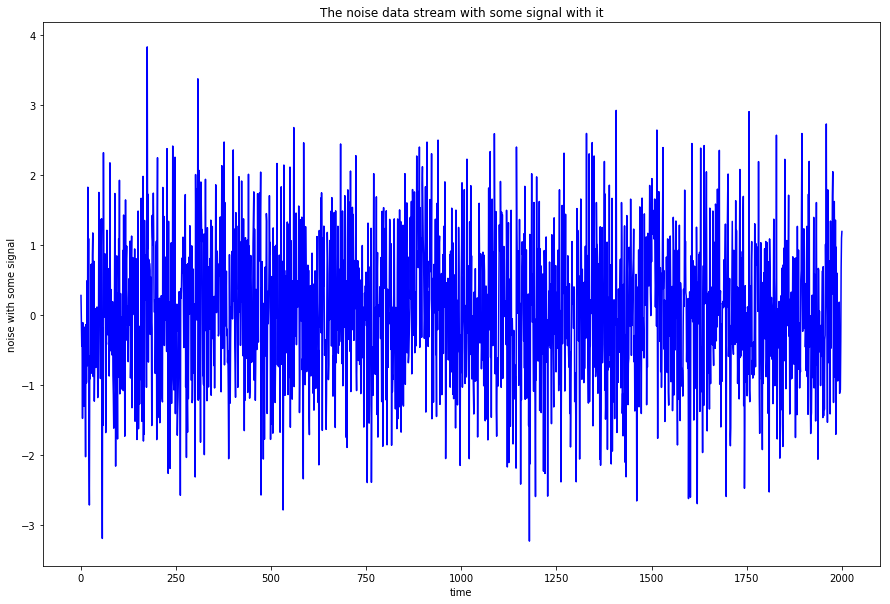

In [2]:
import scipy.ndimage.filters 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline


filein = open("hiro.dat","r")
time_data = []     #time 1D list
hiro_data = []      #signal 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    hiro_data.append(float(tokens[1]))

filein.close()

filein = open("noise.dat","r")
time_data = []     #time 1D list
noise_data = []      #pure noise 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    noise_data.append(float(tokens[1]))

filein.close()

#Now go on and process time_data and signal_data as two separates lists



    

#Plot of the pure noise data stream 2000 elements    
plt.plot(time_data, noise_data, "r")
mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise")
plt.title("The pure noise data stream")
plt.show()



#plot of the signal with noise data stream 
plt.plot(time_data, hiro_data, "b")
mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise with some signal")
plt.title("The noise data stream with some signal with it")
plt.savefig('hiro_dat.png')

# Filterring the data stream and identification of signals in noise.

0.156282232774
5.13440346412
1503


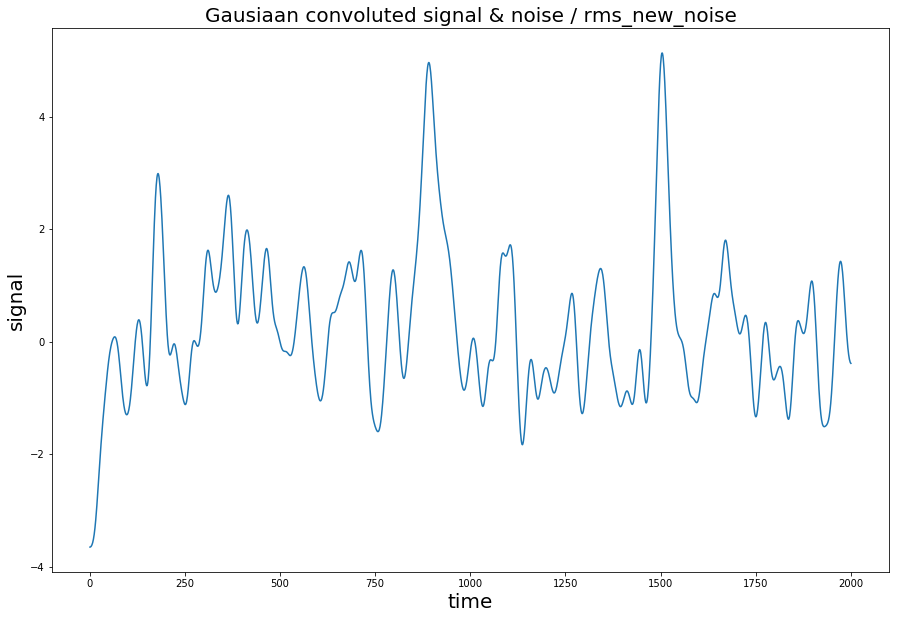

In [3]:



sigma = 10.9



#convolve the gaussian noise on pure noise to get rms amplitude?
conv_hiro = scipy.ndimage.filters.gaussian_filter1d(hiro_data, sigma, axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
conv_noise = scipy.ndimage.filters.gaussian_filter1d(noise_data, sigma, axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
rms = np.sqrt(np.mean(conv_noise**2))

print(rms)
'''
plt.plot(time_data, conv_hiro)
mpl.rcParams["figure.figsize"] = (15,10)
plt.title("Gausiaan convoluted signal ")
plt.show()
'''

plt.plot(time_data, conv_hiro /rms)
plt.title("Gaussian convoluted signal & noise / rms_new_noise", fontsize=20)
mpl.rcParams["figure.figsize"] = (30,20)
plt.xlabel("time", fontsize=20)
plt.ylabel("signal", fontsize=20)
plt.savefig('')
#plt.xlim( (165, 185) )

print(np.max(conv_hiro/rms))
#plt.savefig('hiro_filter.png')
print(np.argmax(conv_hiro /rms))